In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

In [6]:
data = load_breast_cancer()

In [10]:
df = pd.DataFrame(data = data["data"], columns=data["feature_names"])
y= data["target"]

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
df.shape

(569, 30)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [41]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

# Train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

# Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(X_train)

MinMaxScaler()

In [20]:
X_train = scaler.transform(X_train)

In [21]:
X_test= scaler.transform(X_test)

# Multilayer Perceptrons

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
model = Sequential()

In [43]:
stopping = EarlyStopping(patience=15)

In [30]:
# add layers, with a good practice of the number of neurons = no.features
# last layer is sigmoid: 0->1 
model.add(Dense(30,activation ="relu"))
model.add(Dense(15,activation ="relu"))
model.add(Dense(1,activation ="sigmoid"))

In [42]:
model.compile(optimizer="adam",loss ="binary_crossentropy",metrics="accuracy" )

In [44]:
model.fit(X_train,y_train,callbacks= stopping, epochs= 500,validation_data=(X_test,y_test))

Epoch 1/500
12/12 [==============================] - 1s 16ms/step - loss: 0.6685 - accuracy: 0.4331 - val_loss: 0.6561 - val_accuracy: 0.5904
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6397 - accuracy: 0.7743 - val_loss: 0.6208 - val_accuracy: 0.8617
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6035 - accuracy: 0.8583 - val_loss: 0.5836 - val_accuracy: 0.8830
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5667 - accuracy: 0.8688 - val_loss: 0.5449 - val_accuracy: 0.8883
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5271 - accuracy: 0.8740 - val_loss: 0.5037 - val_accuracy: 0.8989
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4841 - accuracy: 0.8793 - val_loss: 0.4554 - val_accuracy: 0.9096
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4329 - accuracy: 0.8871 - val_loss: 0.4001 - val_accuracy: 0.9202
Epoch 8/500


Epoch 59/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0683 - accuracy: 0.9843 - val_loss: 0.0695 - val_accuracy: 0.9787
Epoch 60/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0674 - accuracy: 0.9816 - val_loss: 0.0663 - val_accuracy: 0.9787
Epoch 61/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0648 - accuracy: 0.9843 - val_loss: 0.0655 - val_accuracy: 0.9787
Epoch 62/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0656 - accuracy: 0.9869 - val_loss: 0.0643 - val_accuracy: 0.9840
Epoch 63/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0636 - accuracy: 0.9895 - val_loss: 0.0674 - val_accuracy: 0.9787
Epoch 64/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0624 - accuracy: 0.9869 - val_loss: 0.0623 - val_accuracy: 0.9840
Epoch 65/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0634 - accuracy: 0.9869 - val_loss: 0.0640 - val_accuracy: 0.9787
Epoch 

12/12 [==============================] - 0s 4ms/step - loss: 0.0485 - accuracy: 0.9869 - val_loss: 0.0502 - val_accuracy: 0.9840
Epoch 117/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0412 - accuracy: 0.9921 - val_loss: 0.0461 - val_accuracy: 0.9947
Epoch 118/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0412 - accuracy: 0.9921 - val_loss: 0.0511 - val_accuracy: 0.9787
Epoch 119/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0413 - accuracy: 0.9895 - val_loss: 0.0512 - val_accuracy: 0.9787
Epoch 120/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0428 - accuracy: 0.9895 - val_loss: 0.0461 - val_accuracy: 0.9894
Epoch 121/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0405 - accuracy: 0.9921 - val_loss: 0.0559 - val_accuracy: 0.9787
Epoch 122/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0439 - accuracy: 0.9869 - val_loss: 0.0453 - val_accuracy: 0.9947
Epoch 123/500

In [45]:
history = model.history.history

<AxesSubplot:>

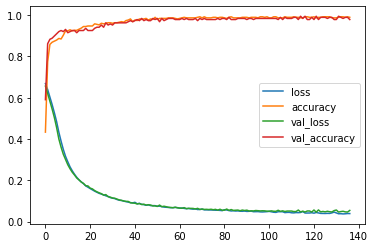

In [47]:
pd.DataFrame(history).plot()

In [49]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9787


[0.05381398648023605, 0.978723406791687]

# SKLEARN - MLP 

In [51]:
from sklearn.neural_network import MLPClassifier

In [54]:
model_sk = MLPClassifier(hidden_layer_sizes=30,activation="relu",solver="adam",max_iter=500,early_stopping=True,n_iter_no_change=15)

In [55]:
model_sk.fit(X_train,y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=30, max_iter=500,
              n_iter_no_change=15)

In [59]:
model_sk.best_validation_score_

0.8974358974358975

In [62]:
model_sk.n_iter_

25

In [60]:
model_sk.score(X_test,y_test)

0.9308510638297872